$
\DeclareMathOperator{\tr}{tr}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\Diag}{Diag}
$

---    
# Sensor Network Localization with Noisy Distance Measurements
    
## Nathan Krislock
### Department of Mathematical Sciences
### Northern Illinois University, USA
    
### [Mini-symposium on Sensor Network Localization and Dynamical Distance Geometry](http://www.fields.utoronto.ca/activities/20-21/constraint-sensor), [The Fields Institute](http://www.fields.utoronto.ca/), Canada
    
### May 21, 2021
    
### [https://github.com/krislock/noisy-sensor-network](https://github.com/krislock/noisy-sensor-network)
    
#### Joint work with Dmitriy Drusvyatskiy, Yuen-Lam Voronin, and Henry Wolkowicz 
    
> Dmitriy Drusvyatskiy, Nathan Krislock, Yuen-Lam Voronin, and Henry Wolkowicz. Noisy Euclidean distance realization: Robust facial reduction and the Pareto frontier. SIAM Journal on Optimization, 27(4):2301–2331, 2017. [https://doi.org/10.1137/15M103710X](https://doi.org/10.1137/15M103710X)

In [1]:
include("functions.jl")
pltsize=(600,600);

---
# Sensor network localization
---

- Find $p_1,\ldots,p_n \in \mathbb{R}^r$ satisfying:

$$
\|p_i - p_j\| = d_{ij}, \quad ij \in E,
$$

$$
p_{n-m+i} = a_i, \quad i=1,\ldots,m.
$$

- $p_1,\ldots,p_{n-m}$ are *sensor positions* and $p_{n-m+1},\ldots,p_n$ are *anchor positions*

- $a_1,\ldots,a_m \in \mathbb{R}^r$ are given anchor positions

- $\| \cdot \|$ is the Euclidean norm

- $E$ is set of edges in a graph $G = (V,E)$ where $V = \{1,\ldots,n\}$

length(E) = 280


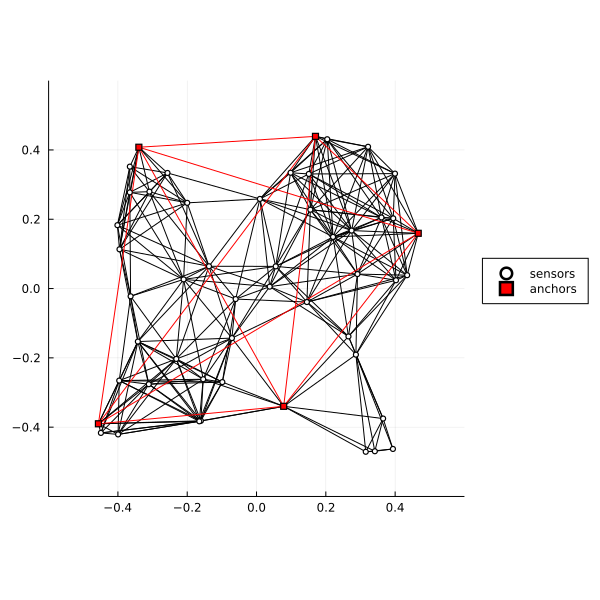

In [2]:
using Random

Random.seed!(2105)

R = 0.3

n, m, r = 50, 5, 2

Strue, A = genprob(n, m, r)

Ptrue = [Strue; A]

E, dtrue = edges(Ptrue, R, m)

@show length(E)

plot_network(Ptrue, E, m); plot!(size=pltsize)

---
# Euclidean distance matrices
---

- An $n \times n$ matrix $D$ is a *Euclidean distance matrix (EDM)* if

\begin{equation}
	\label{eq:EDM}
	\exists p_1,\ldots,p_n \in \mathbb{R}^r : D_{ij} = \|p_i - p_j\|^2.
\end{equation}

- The *embedding dimension* of $D$ is

$$
\dim(D) = \min\{ r : \text{\eqref{eq:EDM} holds} \}.
$$

- $\mathcal{E}^n =$ the set of all $n \times n$ EDMs

---

- Let $p_1,\ldots,p_n \in \mathbb{R}^r$ and $D$ be their EDM

- Let $X \in \mathcal{S}^n$ be the *Gram matrix*:

$$
X_{ij} = p_i^T p_j, \quad \forall ij
$$

- Then $X$ is a semidefinite matrix: $X \in \mathcal{S}^n_+$

$$
D_{ij} = X_{ii} + X_{jj} - 2X_{ij} =: K(X)_{ij}
$$

- $K(\mathcal{S}^n_+) = \mathcal{E}^n$

- $e \in \mathbb{R}^n$ is the vector of all ones

- $K$ is a linear bijection between the *centered* semidefinite matrices

    \begin{equation*}
    \mathcal{S}^n_{c,+} = \left\{X \in \mathcal{S}^n_+ : X e = 0\right\}
    \end{equation*}

  and $\mathcal{E}^n$
  
- $D = K(X)$ and $X \in \mathcal{S}^n_{c,+}$ $\implies$ $\dim(D) = \rank(X)$

---

- $P \colon \mathcal{S}^n \to \mathbb{R}^E$ defined by

$$
P(M)_{ij} = M_{ij}, \quad ij \in E
$$

- $d \in \mathbb{R}^E$ is the vector of **squared distances**

- Sensor network localization is EDM completion
    
\begin{array}{ll}
    \text{minimize}   & \rank X  \\
    \text{subject to} & P \circ K(X) = d \\
                      & Xe = 0 \\
                      & X \succeq 0
\end{array}
    
- Factor $X = PP^T$ where $P \in \mathbb{R}^{n \times r}$ and $r = \rank X$

- Align anchors by solving a Procrustes problem

---
# Multiplicative noise model
---

- Noiseless squared distances $d \in \mathbb{R}^E$

- Noisy squared distances $\bar{d} \in \mathbb{R}^E$

$$
\bar{d}_{ij} = (1 + p\varepsilon_{ij})^2 d_{ij}
$$

- $\varepsilon_{ij} \sim \mathcal{N}(0, 1)$

$$
\frac{\bar{d}_{ij} - d_{ij}}{d_{ij}} \approx 2p \varepsilon_{ij}
$$

- `noise_stats` experiment:
$$
\mathtt{error} = \left\|\bar{d} - d\right\|,
\qquad
\mathtt{std} = \text{std}\left(\left[\frac{\bar{d}_{ij} - d_{ij}}{d_{ij}}\right]_{ij \in E}\right)
$$

mean(errors) = 0.3433055372408844
mean(stds) = 0.40356033041448386


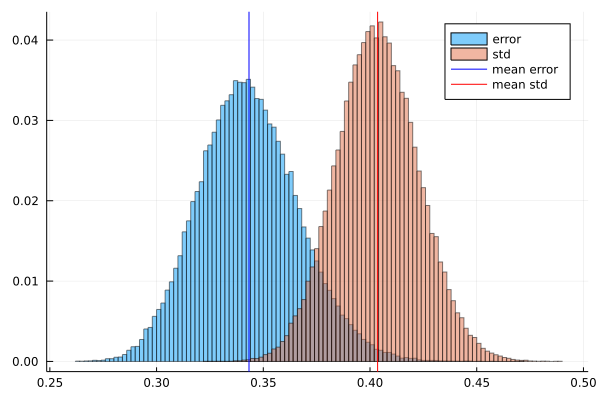

In [3]:
p = 0.2

errors, stds = noise_stats(E, dtrue, p, n, m, N=100_000)
    
@show mean(errors)
@show mean(stds)

plot(legend=:topright)
histogram!(errors, alpha=0.5, normalize=:probability, label="error")
histogram!(stds, alpha=0.5, normalize=:probability, label="std")
vline!([mean(errors)], c=:blue, label="mean error")
vline!([mean(stds)], c=:red, label="mean std")

In [4]:
mean_error(p; N=10_000) = noise_stats(E, dtrue, p, n, m; N=N)[1] |> mean

mean_error(p)

0.34316227965185925

In [5]:
a, b = 0.0, 0.5
ps = range(a, b, length=100)
@time mean_errors = mean_error.(ps; N=1000)

mean_errors[end]

  2.777922 seconds (1.17 M allocations: 1.801 GiB, 7.78% gc time, 1.28% compilation time)


0.9193209673568744

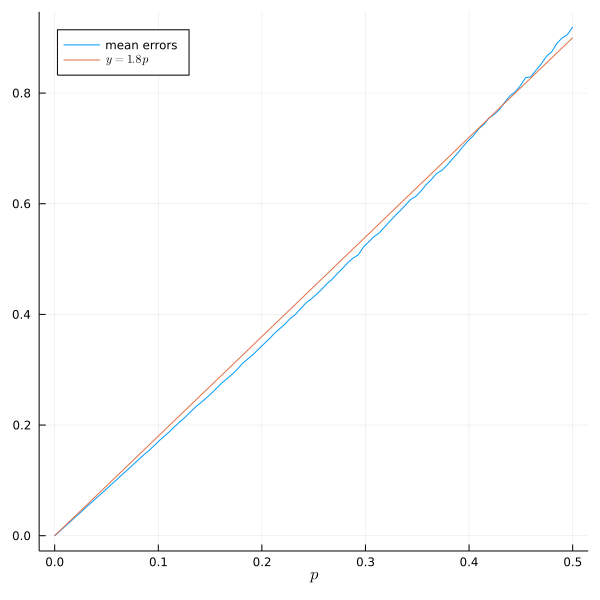

In [6]:
plot(legend=:topleft, ylable=L"y", xlabel=L"p", size=pltsize)
plot!(ps, mean_errors, label="mean errors")
plot!(t -> 1.8t, a, b, label=L"y = 1.8p")

p = 0.2
std((ndy - tdy) ./ tdy) = 0.4188178666705438
norm(ndy - tdy) = 0.3565442379120005


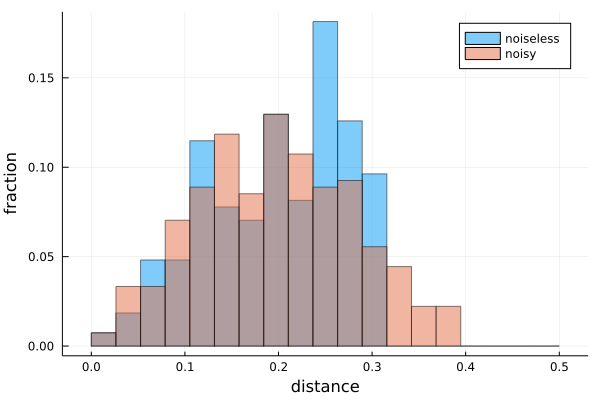

In [7]:
p = 0.2

dnoisy = add_noise(E, dtrue, p, n, m)

ainds = inter_anchor(E, n, m)
yinds = ainds .|> !

tdy = dtrue[yinds]
ndy = dnoisy[yinds]

@show p
@show std((ndy - tdy)./tdy)
@show norm(ndy - tdy)

bins = range(0.0, 0.5, length=20)
plot(legend=:topright, xlabel="distance", ylabel="fraction")
histogram!(sqrt.(tdy), bins=bins, alpha=0.5, label="noiseless", normalize=:probability)
histogram!(sqrt.(ndy), bins=bins, alpha=0.5, label="noisy", normalize=:probability)

---
# Minimizing the rank
---

- We want to find a feasible $X$ with minimal rank.

\begin{array}{ll}
    \text{minimize}   & \rank X  \\
    \text{subject to} & \|P \circ K(X) - \bar{d}\| \le \sigma \\
                      & Xe = 0 \\
                      & X \succeq 0
\end{array}

- A common convex relaxation for rank minimization is to minimize the **nuclear norm** of $X$:

\begin{equation*}
\|X\|_* = \sum_{i=1}^n \sigma_i(X)
\end{equation*}

- Since $X \succeq 0$, we have

\begin{equation*}
\|X\|_* = \tr X
\end{equation*}

- Since $Xe = 0$, we also have

$$
\tr X = \frac{1}{2n} \sum_{i,j=1}^n \|p_i - p_j\|^2
$$

- Minimizing the trace pulls the sensors together

\begin{array}{ll}
    \text{minimize}   & \tr X  \\
    \text{subject to} & \|P \circ K(X) - \bar{d}\| \le \sigma \\
                      & Xe = 0 \\
                      & X \succeq 0
\end{array}

- Maximizing the trace pushes the sensor away from each other

\begin{array}{ll}
    \text{maximize}   & \tr X  \\
    \text{subject to} & \|P \circ K(X) - \bar{d}\| \le \sigma \\
                      & Xe = 0 \\
                      & X \succeq 0
\end{array}

- We expect that maximizing the trace will flatten the graph and give us a low rank $X$

In [8]:
σ = mean_error(p)

0.3432491567474083

In [9]:
σ = 0.40

Xmin = opt_trace(E, dnoisy, σ, n, m; sense=:min)
Xmax = opt_trace(E, dnoisy, σ, n, m; sense=:max)

d̄min = K(Xmin, E)
d̄max = K(Xmax, E)

@show σ
println()
@show norm(d̄min - dnoisy)
@show norm(d̄max - dnoisy)
println()
@show norm(d̄min - dtrue)
@show norm(d̄max - dtrue);

σ = 0.4

norm(d̄min - dnoisy) = 0.4000003391799118
norm(d̄max - dnoisy) = 0.3999999239989122

norm(d̄min - dtrue) = 0.4462884888555847
norm(d̄max - dtrue) = 0.3861690365866579


---
# Low-rank projection
---

- We project the optimal $X$ onto the set of rank $r$ matrices to get $X_r = PP^T$ with $P \in \mathbb{R}^{n \times r}$

- The rows of $P$ are the estimated sensor and anchor positions in $\mathbb{R}^r$

In [10]:
P̄min = low_rank_soln(Xmin)
P̄max = low_rank_soln(Xmax)

d̄min2 = K(P̄min*P̄min', E)
d̄max2 = K(P̄max*P̄max', E)

println("\nProjected solution:")
println()
@show norm(d̄min2 - dnoisy)
@show norm(d̄max2 - dnoisy)
println()
@show norm(d̄min2 - dtrue)
@show norm(d̄max2 - dtrue);


Projected solution:

norm(d̄min2 - dnoisy) = 0.5967776041486991
norm(d̄max2 - dnoisy) = 0.4139902126136598

norm(d̄min2 - dtrue) = 0.5500413406025871
norm(d̄max2 - dtrue) = 0.37396434755165564


---
# Align anchors
---

- The anchor positions $B$ in the matrix $P$ are likely not correct

- First we center $B$ and $A$ by substracting their mean points

- We then align $B$ with $A$ by solving the *Procrustes problem*:

\begin{array}{ll}
    \text{minimize}   & \|B Q - A\|_F  \\
    \text{subject to} & Q^T Q = I. \\
\end{array}

- $Q = UV^T$ is optimal where $B^T A = U \Sigma V^T$ is the singular value decomposition of $B^T A$

- After replacing $P$ with $PQ$, we add the mean of $A$

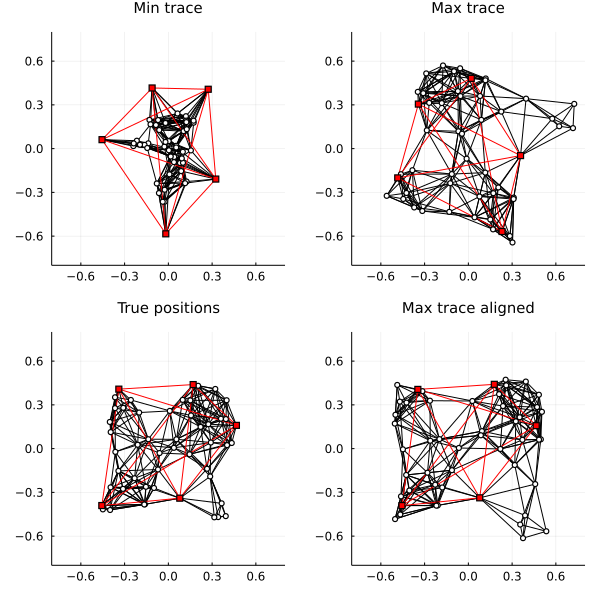

In [11]:
P̄min_aligned = align_anchors(A, P̄min, m)
P̄max_aligned = align_anchors(A, P̄max, m);

lims = (-0.8, 0.8)
plt1 = plot_network(P̄min, E, m, lims=lims, legend=:none);         title!(plt1, "Min trace")
plt2 = plot_network(P̄max, E, m, lims=lims, legend=:none);         title!(plt2, "Max trace")
plt3 = plot_network(Ptrue, E, m, lims=lims, legend=:none);        title!(plt3, "True positions")
plt4 = plot_network(P̄max_aligned, E, m, lims=lims, legend=:none); title!(plt4, "Max trace aligned")

plot(plt1, plt2, plt3, plt4, size=pltsize, titlefontsize=10)

---
# Refine positions
---

- Based on the multiplicative noise model, the *maximum likelihood* solution is given by the optimal solution of the least-squares problem

\begin{array}{ll}
    \text{minimize}   & \sum_{ij \in E} v_{ij}^2  \\
    \text{subject to} & \|p_i - p_j\|^2 = (1 + v_{ij})^2 \bar{d}_{ij}, \quad ij \in E \\
    & p_1,\ldots,p_n \in \mathbb{R}^r
\end{array}

- Since this problem would be challenging to solve, we instead consider the related nonlinear least-squares problem

$$
q(P) = \sum_{ij \in E} \left(\frac{\|p_i - p_j\| - \bar{d}_{ij}}{\bar{d}_{ij}}\right)^2
$$

- The points in $P$ obtained from the maximum trace semidefinite relaxation are used as a good starting point for a gradient descent  minimization of $q(P)$

In [12]:
S̄0 = P̄max_aligned[1:n-m,:]

qS, dS = q(S̄0), q'(S̄0)
qS, -dot(dS,dS)

(66.08294325478516, -450054.335630637)

In [13]:
S̄100 = refine(S̄0, Strue, N=100)
P̄100 = [S̄100; A];


   k        t         qval         RMSD     norm(dS)
  10    2e-04     3.62e+01     9.11e-02     1.54e+03
  20    8e-06     2.20e+01     8.02e-02     1.23e+02
  30    2e-04     1.74e+01     7.59e-02     1.16e+02
  40    5e-04     1.58e+01     7.15e-02     9.10e+01
  50    8e-06     1.54e+01     7.03e-02     3.64e+01
  60    1e-04     1.40e+01     6.44e-02     4.37e+01
  70    1e-04     1.37e+01     6.33e-02     1.47e+02
  80    1e-04     1.33e+01     6.17e-02     8.24e+01
  90    2e-04     1.23e+01     5.67e-02     4.62e+01
 100    8e-06     1.17e+01     5.39e-02     2.01e+01


In [14]:
N = 1000
S̄ = refine(S̄0, Strue, N=N)
P̄ = [S̄; A];


   k        t         qval         RMSD     norm(dS)
 100    8e-06     1.17e+01     5.39e-02     2.01e+01
 200    8e-06     9.04e+00     3.78e-02     8.28e+00
 300    6e-05     8.56e+00     3.57e-02     2.10e+01
 400    8e-06     8.51e+00     3.57e-02     3.54e+00
 500    8e-06     8.37e+00     3.66e-02     2.57e+00
 600    6e-05     8.32e+00     3.71e-02     4.03e+00
 700    2e-05     8.32e+00     3.72e-02     3.25e+00
 800    6e-05     8.31e+00     3.73e-02     2.80e+00
 900    2e-05     8.31e+00     3.74e-02     2.26e+00
1000    6e-05     8.31e+00     3.75e-02     1.84e+00


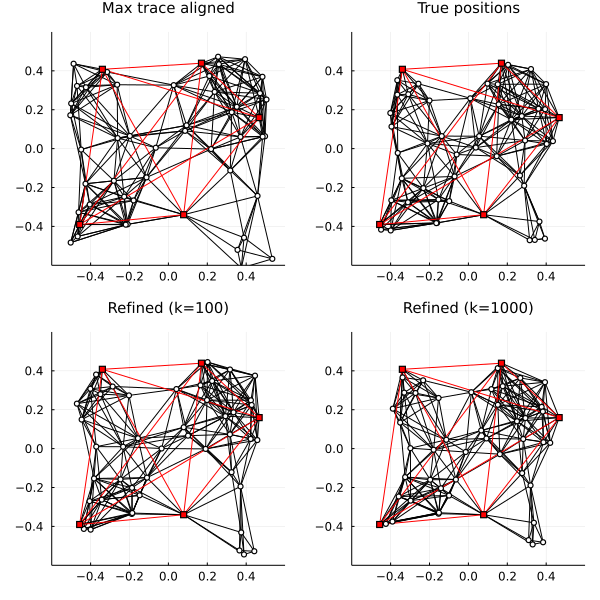

In [15]:
lims = (-0.6, 0.6)
plt1 = plot_network([S̄0; A], E, m, lims=lims, legend=:none); title!(plt1, "Max trace aligned")
plt2 = plot_network(Ptrue, E, m, lims=lims, legend=:none);   title!(plt2, "True positions")
plt3 = plot_network(P̄100, E, m, lims=lims, legend=:none);    title!(plt3, "Refined (k=100)")
plt4 = plot_network(P̄, E, m, lims=lims, legend=:none);       title!(plt4, "Refined (k=$N)")
plot(plt1, plt2, plt3, plt4, size=pltsize, titlefontsize=10)

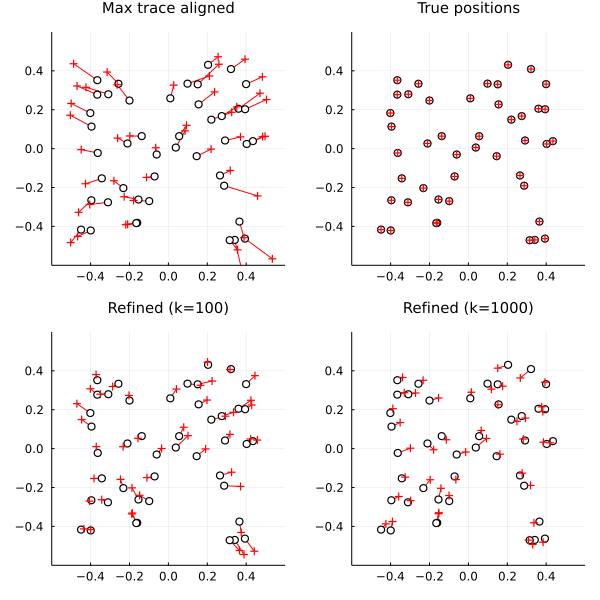

In [16]:
lims=(-0.6, 0.6)
plt1 = plot_errors(Ptrue, S̄0, m, lims=lims, legend=:none);    title!(plt1, "Max trace aligned")
plt2 = plot_errors(Ptrue, Strue, m, lims=lims, legend=:none); title!(plt2, "True positions")
plt3 = plot_errors(Ptrue, S̄100, m, lims=lims, legend=:none);  title!(plt3, "Refined (k=100)")
plt4 = plot_errors(Ptrue, S̄, m, lims=lims, legend=:none);     title!(plt4, "Refined (k=$N)")
plot(plt1, plt2, plt3, plt4, size=pltsize, titlefontsize=10)

---
# Pareto frontier

---

- A famous example of a *Pareto frontier* is the [efficient frontier](https://en.wikipedia.org/wiki/Efficient_frontier) in *portfolio optimization*. 

- An investment portfolio is on the efficient frontier if there is no other portfolio with a higher expected return at the same level of risk.

![frontier](https://upload.wikimedia.org/wikipedia/commons/e/e1/Markowitz_frontier.jpg)

- This efficient frontier can be parametrized by risk or by expected return.

---

- For our problem, a matrix $X$ is on the *Pareto frontier* if it is an optimal solution of the maximum trace problem.

\begin{array}{lll}
    \psi(\sigma) =
    & \text{maximize}   & \tr X  \\
    & \text{subject to} & \|P \circ K(X) - d\| \le \sigma \\
    &                   & Xe = 0 \\
    &                   & X \succeq 0
\end{array}

- This Pareto frontier is parametrized by the error level $\sigma$, but can also be parametrized by the trace level $\tau$.

- That is, $X$ is on the Pareto frontier if it is an optimal solution of the minimum error problem.

\begin{array}{lll}
    \phi(\tau) =
    & \text{minimize}   & \|P \circ K(X) - d\|  \\
    & \text{subject to} & \tr X \ge \tau \\
    &                   & Xe = 0 \\
    &                   & X \succeq 0
\end{array}

- We can find a solution of the first problem by solving the second problem with $\tau$ satisfying

$$\phi(\tau) = \sigma.$$

---

Our approach here is inspired by Pareto frontier approach used in the [SPGL1](https://friedlander.io/spgl1/) solver.

> Ewout van den Berg and Michael P. Friedlander. Probing the Pareto frontier for basis pursuit solutions. SIAM Journal on Scientific Computing, 31(2):890–912, 2008. [https://doi.org/10.1137/080714488](https://doi.org/10.1137/080714488)

In [17]:
function ϕ(τ)
    optimizer = optimizer_with_attributes(
        SCS.Optimizer,
        "eps" => 1e-4,
        "verbose" => 0)
    
    model = Model(optimizer)
    
    @variable(model, X[1:n,1:n], PSD)
    @variable(model, t)
    
    # Minimize norm(K(X,E) - dnoisy)
    @objective(model, Min, t)
    @constraint(model, [t; K(X,E) - dnoisy] in SecondOrderCone())
    
    @constraint(model, tr(X) ≥ τ)
    @constraint(model, sum(X, dims=2) .== 0)
    
    optimize!(model)
    objective_value(model)
end

τ = tr(Xmax)
σ, ϕ(τ)

(0.4, 0.39997014472363596)

In [18]:
a, b = 0.5τ, 1.5τ

τs = range(a, b, length=50)
@time ϕs = ϕ.(τs);

 34.586755 seconds (3.56 M allocations: 581.955 MiB, 0.34% gc time, 0.10% compilation time)


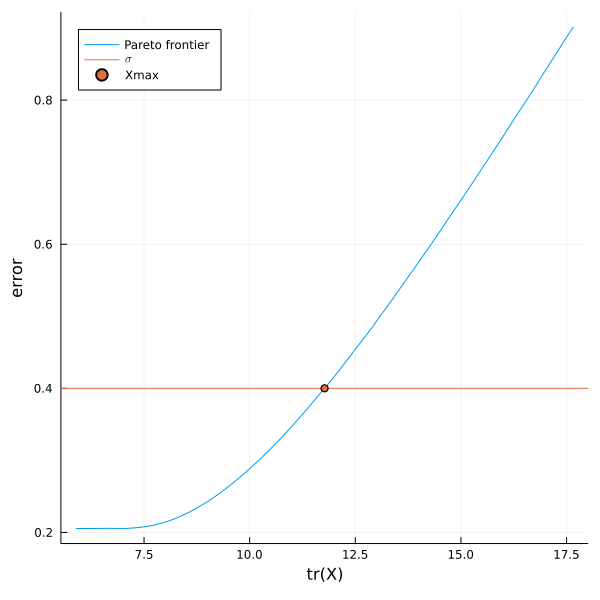

In [19]:
plot(legend=:topleft, xlabel="tr(X)", ylabel="error", size=pltsize)
plot!(τs, ϕs, label="Pareto frontier")
hline!([σ], label=L"\sigma")
scatter!([tr(Xmax)], [norm(K(Xmax,E) - dnoisy)], c=2, label="Xmax")

---

# Finding $\tau$

---

- Let $L = P \circ K$ and define

$$f(X) = \frac12\|L(X) - d\|^2, \qquad 
\mathcal{D} = \big\{ X \succeq 0 : \tr X \ge 1, Xe = 0\big\}$$

- This problem has the same optimal set as the minimum error problem

$$h(\tau) = \min\big\{f(X) : X \in \tau\mathcal{D}\big\}$$

- We will use an inexact-Newton algorithm for solving

$$
h(\tau) = \frac{1}{2}\sigma^2
$$

---

- The function $f$ is convex and smooth with

$$\nabla f(X) = L^*(L(X) - d)$$

- The adjoint of $L$ is $L^* = K^* \circ P^*$

- The adjoint of $P \colon \mathcal{S}^n \to \mathbb{R}^E$ is

$$P^*(y) = M
\quad \iff \quad
M_{ij} =
\begin{cases}
\frac{1}{2}y_{ij}, & ij \in E \\
0, & ij \not\in E
\end{cases}
$$

- The adjoint of $K \colon \mathcal{S}^n \to \mathcal{S}^n$ is

$$
K^*(M) = 2\big(\Diag(Me) - M\big)
$$

- The matrix $\nabla f(X)$ will be sparse if the graph $G = (V,E)$ is sparse

In [20]:
f(X, E, d) = 1/2*norm(L(X, E) - d)^2

∇f(X, E, d) = Ls(L(X, E) - d, E)

∇f (generic function with 1 method)

In [21]:
fval = f(Xmax, E, dnoisy)

0.07999996959956777

In [22]:
dX = ∇f(Xmax, E, dnoisy)

50×50 SparseMatrixCSC{Float64, Int64} with 610 stored entries:
⠑⢄⠠⠈⠈⠐⠉⠔⠊⠢⠒⠢⠉⠐⠉⠔⡠⢂⡠⠠⠑⢂⠔⠡⢀
⡀⠂⠕⢅⢍⠄⢉⠇⠔⠐⠠⠐⣁⠥⣉⠢⠸⠀⠐⠥⡡⠄⠂⡐⠈
⢂⠀⠃⠕⡕⣭⠒⢨⡅⠀⣈⡀⠒⢩⠒⠀⠄⠀⠀⠅⠂⢩⢀⠂⠰
⢃⠄⠧⠔⡘⣀⠻⢆⡰⠀⣀⠰⠓⢅⠛⠄⠰⠀⠠⠤⠇⢀⢀⠂⠈
⠪⡀⢐⠁⠁⠉⠐⠊⢕⢕⠭⢕⠂⠈⠀⡨⢐⠅⢀⠩⠪⠅⡈⢀⠅
⠸⡀⢀⠂⠂⠸⢀⡘⢇⢇⠿⢇⠀⠘⠀⡐⢀⠇⢀⠒⠸⠇⡸⢀⠆
⢃⠀⠅⡜⡜⣀⠝⢄⡈⠀⣀⠀⠛⢄⠫⠀⠠⠀⠀⡤⠅⣀⢀⠃⠀
⢃⠄⠣⡘⠘⠀⠛⠄⡀⡠⢀⠠⠋⠂⠛⢄⠰⡀⠠⢀⢃⡀⠄⠡⡘
⠠⢊⠒⠂⠀⠁⠐⠂⠔⠔⠤⠔⠀⠂⠐⠢⡑⢌⡁⠂⠢⢌⠠⠀⠌
⠀⡊⠔⡄⠄⠄⠀⡆⡄⡐⢠⠐⠀⡤⠀⢂⠡⠈⢑⣴⢀⡌⠂⠐⡈
⠱⢀⠁⠎⡌⣀⠉⢁⠎⠆⠶⠆⠁⢡⠉⠰⡈⢆⡀⠴⠱⢆⠀⠁⢆
⠔⡁⢈⠠⠠⠐⠠⠐⠂⢈⠒⢊⠤⠐⠄⡁⠀⠂⢈⠀⠄⠀⣱⣾⣶
⠀⠐⠂⠀⠐⠂⠂⠀⠁⠁⠈⠁⠀⠀⠒⠈⠂⠁⠂⠈⠈⠑⠘⠛⠛

---
# The Frank-Wolfe algorithm
---

- We use the *Frank-Wolfe algorithm* to approximately solve

$$
h(\tau) = \min\big\{ f(X) : X \in \tau\mathcal{D}\big\}
$$

- Given $X_0 \in \tau\mathcal{D}$ and $\alpha > 1$, we obtain a feasible $X_k$ and bounds $l_k$ and $u_k$ such that

$$
l_k \le h(\tau) \le f(X_k) = u_k
$$

- The matrix $X_k$ is never explicitly stored

---
### The search direction

- At iteration $k$, we have $X_k \in \tau\mathcal{D}$

- $\Delta X = S - X_k$ is our search direction, where $S \in \tau\mathcal{D}$ minimizes the first-order approximation of $f$ at $X_k$:

$$
f(X_k) + \langle \nabla f(X_k), S - X_k \rangle
$$

- That is, we solve the subproblem

$$
\min\big\{ \langle \nabla f(X_k), S \rangle : S \in \tau\mathcal{D}\big\}
$$

- The optimal solution of this subproblem is $S = \tau v v^T$ and the optimal value is $\tau \lambda$, where $\lambda$ is the smallest eigenvalue of $\nabla f(X_k)$ restricted to $e^\perp$, and $v$ is the corresponding unit eigenvector

- The derivative of the optimal value $\tau \lambda$ of the subproblem with respect to $\tau$ is $\lambda$

---
### The step length

- The step length $\gamma \in (0, 1]$ is chosen to minimize $f(X_k + \gamma \Delta X)$:

$$
\frac{d}{d\gamma} f(X_k + \gamma \Delta X) = 
\big\langle L^*(L(X_k + \gamma \Delta X) - d), \Delta X \big\rangle = 0
$$

- Letting $y := L(X_k) - d$, we have

$$
\big\langle y + \gamma L(\Delta X), L(\Delta X) \big\rangle = 0
$$

- Thus,

$$
\gamma = -\frac{\langle L(\Delta X), y\rangle}{\|L(\Delta X)\|^2}
$$

---
### Update

- We let 

$$
X_{k+1} = X_k + \gamma \Delta X
$$

- Since $f$ is convex and $X_{k+1} \in \tau\mathcal{D}$, we have

$$
f(X_k) + \langle \nabla f(X_k), \Delta X \rangle
\le \min\big\{ f(X) : X \in \tau\mathcal{D}\big\} \le f(X_{k+1})
$$

- We begin with the valid bounds $l_0 = \frac{1}{2}\sigma^2$ and $u_0 = \infty$

$$
l_0 \le h(\tau) \le u_0
$$

- We update the bounds

$$
l_{k+1} = \max\{l_k, f(X_k) + \langle \nabla f(X_k), \Delta X \rangle\},
\qquad
u_{k+1} = \min\{u_k, f(X_{k+1})\}
$$



---
### Stopping

- We stop the Frank-Wolfe method when

$$
u_k - \frac{1}{2}\sigma^2 \le \alpha \left(l_k - \frac{1}{2}\sigma^2\right)
$$

- $\alpha$ is a scalar that is larger than $1$

- We have

$$
0 \le l_k - \frac{1}{2}\sigma^2 \le h(\tau) - \frac{1}{2}\sigma^2 \le \alpha \left(l_k - \frac{1}{2}\sigma^2\right)
$$

- We return $l_k$, $u_k$, and the eigenvalue $\lambda$ to the inexact-Newton method

- The function $t \mapsto l_k + \lambda(t - \tau)$ is an affine minorant of $h$

$$
l_k + \lambda(t - \tau) \le h(t), \quad \forall t
$$

In [23]:
function FrankWolfe(τ, flb0, d, E, n; α=2.0)

    d = copy(dnoisy)

    fub = Inf
    flb = flb0
    λ = NaN
    
    v = randn(n)
    v .-= mean(v)
    v .*= sqrt(τ)/norm(v)
    LX0 = [(v[e[1]] - v[e[2]])^2 for e in E]
    
    Xinfo = Dict(:γ=>[1.0], :v=>[v])

    LX = copy(LX0)
    y = LX - d
    fX = 1/2*norm(y)^2
    
    k = 0
    done = false
    while !done
        
        # Compute the search direction dX
        Lsy = Ls(y, E)
        #evals, evecs = eigs(Lsy, nev=2, which=:SR)
        evals, evecs = eigen(Matrix(Lsy))
        idx = (abs(evals[1]) > 1e-8) ? 1 : 2

        v .= evecs[:,idx]
        v .-= mean(v)
        v .*= sqrt(τ)/norm(v)
        LS = [(v[e[1]] - v[e[2]])^2 for e in E]
        LdX = LS - LX

        # Update lower bound
        """
        lbnew = fX + dot(Ls(LX - d), dX)
              = fX + dot(y, LdX)
        """

        flbnew = fX + dot(y, LdX)
        if flbnew > flb
            λ = evals[idx]
        end
        flb = max(flb, flbnew)

        # Compute step length
        γ = -dot(LdX, y)/norm(LdX)^2
        
        # Save γ and v to build X
        push!(Xinfo[:γ], γ)
        push!(Xinfo[:v], copy(v))

        # Update X
        """
        LXnew = L(X + γ (S - X))
              = LX + γ LdX
        """

        LX .+= γ.*LdX
        y .= LX .- d
        fX = 1/2*norm(y)^2
        
        # Update upper bound
        fubnew = fX
        fub = min(fub, fubnew)

        k += 1
        
        # Check if done
        done = (fub - flb0) ≤ α*(flb - flb0)
        
        if k == 1000
            break
        end
    end
    
    @show k
    
    k, flb, fub, λ, Xinfo
end

FrankWolfe (generic function with 1 method)

In [24]:
τnew = 1.5tr(Xmax)
σ = 0.4
flb0 = σ^2/2

0.08000000000000002

k = 34


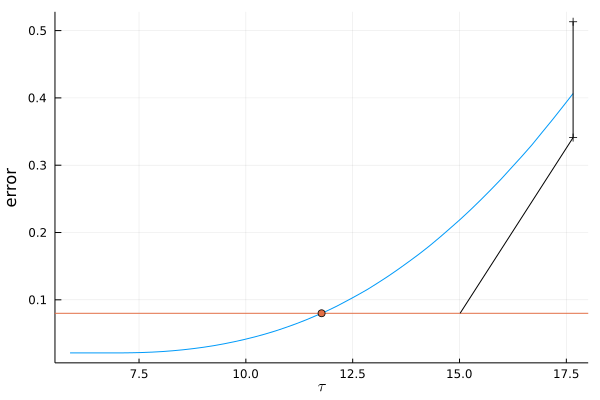

In [25]:
τ = τnew

k, flb, fub, λ, Xinfo = FrankWolfe(τ, flb0, dnoisy, E, n)

τnew = τ - (flb - flb0)/λ

plt1 = plot(legend=:none, xlabel=L"\tau", ylabel="error")
plot!(τs, ϕs.^2/2)
hline!([σ^2/2])
scatter!([tr(Xmax)], [norm(K(Xmax,E) - dnoisy)^2/2], c=2, label="Xmax")
plot!([τ, τ], [flb, fub], c=:black, m=:plus, label=:none)
plot!(t -> flb + λ*(t - τ), τnew, τ, c=:black, label=:none)

---
# The inexact-Newton algorithm
---

- We are given an interval $[\sigma_l, \sigma_u]$ and seek $\tau$ such that

$$
\frac{1}{2}\sigma_l^2 \le h(\tau) \le \frac{1}{2}\sigma_u^2
$$

- At iteration $k$ we have $\tau_k$ such that 

$$
h(\tau_k) > \frac{1}{2}\sigma_l^2
$$

- We call the Frank-Wolfe method to obtain $l_k$, $u_k$, and $\lambda_k$

$$
l_k + \lambda_k(t - \tau_k) \le h(t), \quad \forall t
$$

- We stop if $u_k \le \frac{1}{2}\sigma_u^2$; otherwise we update

$$
\tau_{k+1} = \tau_k - \frac{1}{\lambda_k}\left(l_k - \frac{1}{2}\sigma_l^2\right)
$$

In [26]:
function inexact_Newton(τ0, σlb, σub, dnoisy, E, n; α=2.0)
    τ = τ0

    fub = Inf
    flb0 = 1/2*σlb^2

    k, flb, fub, λ, Xinfo = FrankWolfe(τ, flb0, dnoisy, E, n; α=α)
    fwiters = k
    
    while fub > 1/2*σub^2
        @printf("τ = %6.2f, ϕ(τ) ∈ [%4.2f,%4.2f]\n", 
            τ, sqrt(2flb), sqrt(2fub))
        τ = τ - (flb - flb0)/λ
        k, flb, fub, λ, Xinfo = FrankWolfe(τ, flb0, dnoisy, E, n; α=α)
        fwiters += k
    end

    @show fwiters

    # Build X
    X = zeros(n,n)
    for i = 1:length(Xinfo[:γ])
        γ = Xinfo[:γ][i]
        v = Xinfo[:v][i]
        X += γ*(v*v' - X)
    end

    X
end

inexact_Newton (generic function with 1 method)

k = 14
τ =  25.00, ϕ(τ) ∈ [1.39,1.90]
k = 25
τ =  20.36, ϕ(τ) ∈ [1.01,1.33]
k = 31
τ =  16.87, ϕ(τ) ∈ [0.70,0.94]
k = 46
τ =  14.68, ϕ(τ) ∈ [0.55,0.72]
k = 64
τ =  13.05, ϕ(τ) ∈ [0.45,0.56]
k = 108
τ =  11.82, ϕ(τ) ∈ [0.38,0.44]
k = 180
fwiters = 468
  1.476795 seconds (2.77 M allocations: 216.210 MiB, 3.98% gc time, 62.61% compilation time)
(tr(X), norm(K(X, E) - dnoisy)) = (11.045040892314718, 0.37466337409788814)

   k        t         qval         RMSD     norm(dS)
 100    8e-06     1.18e+01     5.30e-02     2.20e+01
 200    6e-05     8.95e+00     3.70e-02     2.55e+01
 300    6e-05     8.51e+00     3.57e-02     8.85e+00
  3.286037 seconds (33.38 M allocations: 1.742 GiB, 9.52% gc time)


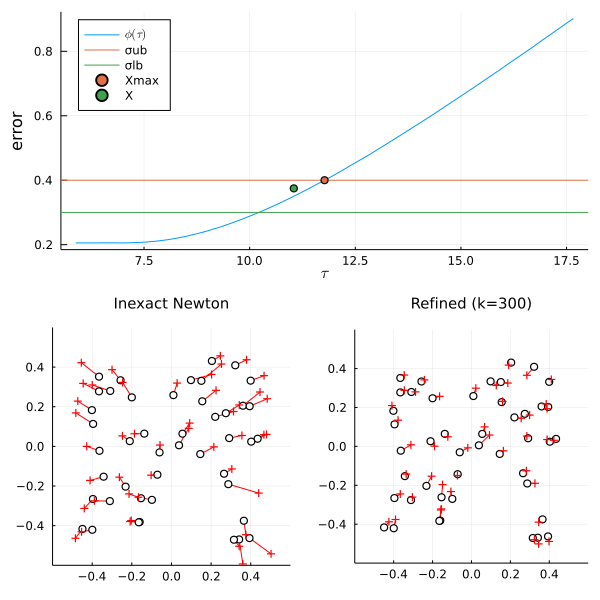

In [27]:
τ0 = n/2
σlb, σub = 0.3, 0.4

@time X = inexact_Newton(τ0, σlb, σub, dnoisy, E, n)

@show tr(X), norm(K(X,E) - dnoisy)

plt1 = plot(legend=:topleft, xlabel=L"\tau", ylabel="error")
plot!(τs, ϕs, label=L"\phi(\tau)")
hline!([σub], label="σub")
hline!([σlb], label="σlb")
scatter!([tr(Xmax)], [norm(K(Xmax,E) - dnoisy)], c=2, label="Xmax")
scatter!([tr(X)], [norm(K(X,E) - dnoisy)], c=3, label="X")

P̄fw = low_rank_soln(X)
P̄fw_aligned = align_anchors(A, P̄fw, m)
S̄fw_aligned = P̄fw_aligned[1:n-m,:]

N = 300
@time S̄ = refine(S̄fw_aligned, Strue, N=N)

lims=(-0.6, 0.6)
plt2 = plot_errors(Ptrue, S̄fw_aligned, m, lims=lims, legend=:none); title!(plt2, "Inexact Newton")
plt3 = plot_errors(Ptrue, S̄, m, lims=lims, legend=:none); title!(plt3, "Refined (k=$N)")
plt4 = plot(plt2, plt3, titlefontsize=10)
plot(plt1, plt4, layout=(2,1), size=pltsize)

---
# A larger example
---

length(E) = 3541


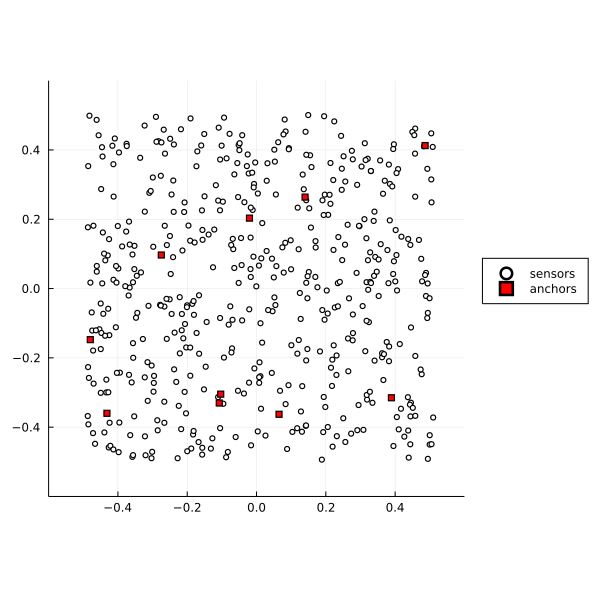

In [28]:
Random.seed!(2105)

R = 0.1

n, m, r = 500, 10, 2

Strue, A = genprob(n, m, r)

Ptrue = [Strue; A]

E, dtrue = edges(Ptrue, R, m)

@show length(E)

plot_network(Ptrue, E, m, plot_edges=false); plot!(size=pltsize)

p = 0.2
std((ndy - tdy) ./ tdy) = 0.40272146134878584
norm(ndy - tdy) = 0.1362933682250736


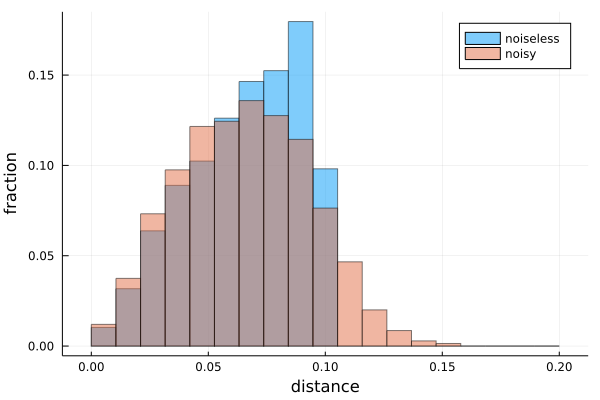

In [29]:
p = 0.2

dnoisy = add_noise(E, dtrue, p, n, m)

ainds = inter_anchor(E, n, m)
yinds = ainds .|> !

tdy = dtrue[yinds]
ndy = dnoisy[yinds]

@show p
@show std((ndy - tdy)./tdy)
@show norm(ndy - tdy)

bins = range(0.0, 2R, length=20)
plot(legend=:topright, xlabel="distance", ylabel="fraction")
histogram!(sqrt.(tdy), bins=bins, alpha=0.5, label="noiseless", normalize=:probability)
histogram!(sqrt.(ndy), bins=bins, alpha=0.5, label="noisy", normalize=:probability)

In [30]:
# Find a good τ0 by computing bounds
τ0 = 150.0
k, flb, fub, λ, Xinfo = FrankWolfe(τ0, 0.0, dnoisy, E, n; α=2.0)

sqrt(2flb), sqrt(2fub)

k = 234


(0.252351203735964, 0.35621594020100045)

In [31]:
σlb, σub = 0.1, 0.2

@time X = inexact_Newton(τ0, σlb, σub, dnoisy, E, n; α=2.0)

@show tr(X), norm(K(X,E) - dnoisy);

k = 221
τ = 150.00, ϕ(τ) ∈ [0.26,0.35]
k = 492
τ = 133.63, ϕ(τ) ∈ [0.19,0.25]
k = 765
fwiters = 1478
 85.281192 seconds (172.59 k allocations: 17.991 GiB, 0.59% gc time, 0.00% compilation time)
(tr(X), norm(K(X, E) - dnoisy)) = (123.01890133117222, 0.19876249888443043)


In [32]:
P̄fw = low_rank_soln(X)
P̄fw_aligned = align_anchors(A, P̄fw, m)
S̄fw_aligned = P̄fw_aligned[1:n-m,:]

N = 300
@time S̄ = refine(S̄fw_aligned, Strue, N=N);


   k        t         qval         RMSD     norm(dS)
 100    2e-07     4.45e+02     9.36e-02     3.48e+03
 200    1e-07     3.76e+02     9.25e-02     6.39e+02
 300    1e-07     3.66e+02     9.20e-02     8.63e+02
 63.358828 seconds (580.32 M allocations: 106.448 GiB, 17.90% gc time)


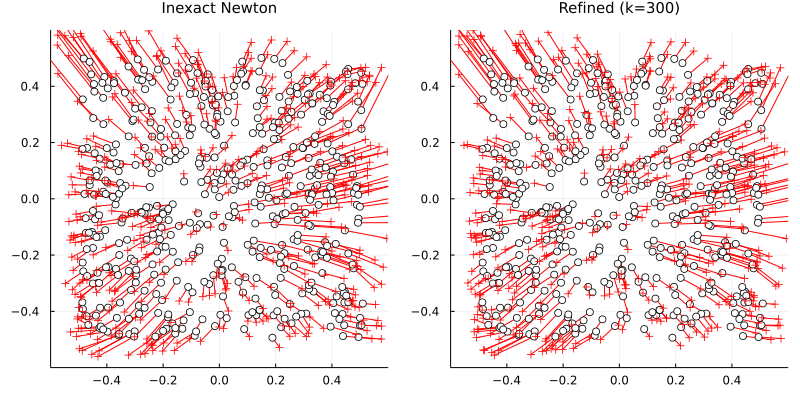

In [33]:
lims=(-0.6, 0.6)
plt1 = plot_errors(Ptrue, S̄fw_aligned, m, lims=lims, legend=:none); title!(plt1, "Inexact Newton")
plt2 = plot_errors(Ptrue, S̄, m, lims=lims, legend=:none); title!(plt2, "Refined (k=$N)")
plot(plt1, plt2, titlefontsize=10, size=(800,400))